In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [2]:
laptop_data_path = "data/csv/laptop_data.csv"

In [3]:
df = pd.read_csv(laptop_data_path)
df_uncleaned = pd.read_csv(laptop_data_path)
df_cleaned = pd.read_csv(laptop_data_path)

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)

In [6]:
df.set_index('index', inplace=True)

In [7]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
index,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [8]:
df.shape

(1303, 11)

In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#**CLEANING RESOLUTION**

In [11]:
import re

In [12]:
def extract_resolution(resolution):
    match = re.search(r"\d+x\d+", resolution, re.IGNORECASE)
    return match.group() if match else None

In [13]:
df["ScreenResolution"] = df["ScreenResolution"].apply(extract_resolution)

In [14]:
df["ScreenResolution"].isnull().sum()

0

In [15]:
concatenate_ScreenResolution = pd.concat([df_uncleaned['ScreenResolution'], df['ScreenResolution']], axis=1)
concatenate_ScreenResolution.columns = ["ScreenResolution Unclean", "ScreenResolution Clean"]
concatenate_ScreenResolution.head(5)

,ScreenResolution Unclean,ScreenResolution Clean
0,IPS Panel Retina Display 2560x1600,2560x1600
1,1440x900,1440x900
2,Full HD 1920x1080,1920x1080
3,IPS Panel Retina Display 2880x1800,2880x1800
4,IPS Panel Retina Display 2560x1600,2560x1600


#**CLEANING COMPANY**

In [16]:
df['Company'] = df['Company'].str.upper()

In [17]:
df["Company"].head()

index
0    APPLE
1    APPLE
2       HP
3    APPLE
4    APPLE
Name: Company, dtype: object

#**CLEANING typename**

In [18]:
df['TypeName'] = df['TypeName'].str.upper()

In [19]:
df["TypeName"].head()

index
0    ULTRABOOK
1    ULTRABOOK
2     NOTEBOOK
3    ULTRABOOK
4    ULTRABOOK
Name: TypeName, dtype: object

#**CLEANING CPU**

In [20]:
df["Cpu"]

index
0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [21]:
def extract_cpu(str):
  pattern = "\d+\.\d+GHz"
  res = re.search(pattern, str, re.IGNORECASE)
  if res:
    return res.group()
  else:
    pattern = "\d+GHz"
    res = re.search(pattern, str, re.IGNORECASE)
    return res.group()
  return None

In [22]:
df["Cpu"] = df["Cpu"].apply(extract_cpu)

In [23]:
df["Cpu"] = df["Cpu"].str.replace("GHz", "")

In [24]:
df["Cpu"] = df["Cpu"].astype("float")

In [25]:
df["Cpu"].isnull().sum()

0

In [27]:
concatenate = pd.concat([df_uncleaned['Cpu'], df['Cpu']], axis=1)
concatenate.columns = ["Cpu Unclean", "Cpu Clean"]
concatenate.tail(5)

,Cpu Unclean,Cpu Clean
1298,Intel Core i7 6500U 2.5GHz,2.5
1299,Intel Core i7 6500U 2.5GHz,2.5
1300,Intel Celeron Dual Core N3050 1.6GHz,1.6
1301,Intel Core i7 6500U 2.5GHz,2.5
1302,Intel Celeron Dual Core N3050 1.6GHz,1.6


#**CLEANING RAM**

In [28]:
df["Ram"].head(5)

index
0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: Ram, dtype: object

In [29]:
df["Ram"] = df["Ram"].str.replace("GB", "")

In [30]:
df["Ram"] = df["Ram"].astype("float")

In [31]:
concatenate = pd.concat([df_uncleaned['Ram'], df['Ram']], axis=1)
concatenate.columns = ["Ram Unclean", "Ram Clean"]
concatenate.tail(5)

,Ram Unclean,Ram Clean
1298,4GB,4.0
1299,16GB,16.0
1300,2GB,2.0
1301,6GB,6.0
1302,4GB,4.0


#**CLEANING Memory**

In [32]:
df["Memory"].head()

index
0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: Memory, dtype: object

In [33]:
def extract_Memory(Memory):
    if "+" in Memory:
      Memory = Memory.split("+")
      Memory = [t.strip() for t in Memory]
      Memory = [extract_Memory(t) for t in Memory]
      Memory = "+".join(Memory)
      return Memory
    if isinstance(Memory, str):
        match = re.search(r'\d+.\d+(GB|TB)', Memory)
        if match:
            return match.group()
        else:
            match = re.search(r'\d+(GB|TB)', Memory)
            return match.group()
    return None

In [34]:
def convert_Memory(Memory):
    # Kiểm tra xem giá trị có phải là chuỗi không
    if isinstance(Memory, str):
      if "+" in Memory:
        Memory = Memory.split("+")
        Memory = [convert_Memory(t) for t in Memory]
        Memory = sum(Memory)
        return Memory
      # Loại bỏ các chuỗi 'GB' và 'TB'
      if 'GB' in Memory:
        Memory = Memory.replace('GB', '')
      # Chuyển đổi thành số
        Hard_Drive_value = float(Memory)
        return Hard_Drive_value
      if 'TB' in Memory:
        Memory = Memory.replace('TB', '')
        Hard_Drive_value = float(Memory)
        Hard_Drive_value *= 1024
        return Hard_Drive_value
    return None

In [35]:
df["Memory"] = df["Memory"].apply(extract_Memory)

In [36]:
df["Memory"] = df["Memory"].apply(convert_Memory)

In [37]:
df["Memory"] = df["Memory"].astype("float")

In [38]:
df["Memory"].isnull().sum()

0

In [39]:
concatenate = pd.concat([df_uncleaned['Memory'], df['Memory']], axis=1)
concatenate.columns = ["Memory Unclean", "Memory Clean"]
concatenate.tail(5)

,Memory Unclean,Memory Clean
1298,128GB SSD,128.0
1299,512GB SSD,512.0
1300,64GB Flash Storage,64.0
1301,1TB HDD,1024.0
1302,500GB HDD,500.0


#**CLEANING Gpu**

In [40]:
df["Gpu"].head(10)

index
0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
5                   AMD Radeon R5
6         Intel Iris Pro Graphics
7          Intel HD Graphics 6000
8            Nvidia GeForce MX150
9          Intel UHD Graphics 620
Name: Gpu, dtype: object

In [41]:
list_series_gpu_groupby = df["Gpu"].sort_values()

In [42]:
list_series_gpu_groupby.head(10)

index
1086     AMD FirePro W4190M
471     AMD FirePro W4190M 
229     AMD FirePro W4190M 
387      AMD FirePro W5130M
1103     AMD FirePro W6150M
178          AMD R17M-M1-70
83          AMD R4 Graphics
412          AMD Radeon 520
272          AMD Radeon 520
162          AMD Radeon 520
Name: Gpu, dtype: object

In [43]:
list_gpu_groupby_counts = df.groupby('Gpu').size()

In [44]:
list_gpu_groupby_counts.head(10)

Gpu
AMD FirePro W4190M      1
AMD FirePro W4190M      2
AMD FirePro W5130M      1
AMD FirePro W6150M      1
AMD R17M-M1-70          1
AMD R4 Graphics         1
AMD Radeon 520         17
AMD Radeon 530         41
AMD Radeon 540          1
AMD Radeon Pro 455      1
dtype: int64

#**CLEANING OpSys**

In [45]:
df["OpSys"] = df["OpSys"].str.upper()

In [46]:
df["OpSys"].head(5)

index
0    MACOS
1    MACOS
2    NO OS
3    MACOS
4    MACOS
Name: OpSys, dtype: object

#**CLEANING Weight**

In [47]:
df["Weight"].head(5)

index
0    1.37kg
1    1.34kg
2    1.86kg
3    1.83kg
4    1.37kg
Name: Weight, dtype: object

In [48]:
df["Weight"] = df["Weight"].str.lower()

In [49]:
def extract_weight(weight):
  result = re.search("\d+\.\d+", weight)
  if result:
    return result.group()
  else:
    result = re.search("\d+", weight)
    return result.group()
  return None

In [50]:
df["Weight"] = df["Weight"].apply(extract_weight)

In [51]:
df["Weight"] = df["Weight"].astype("float")

In [52]:
df["Weight"].isnull().sum()

0

In [53]:
concatenate = pd.concat([df_uncleaned['Weight'], df['Weight']], axis=1)
concatenate.columns = ["Weight Unclean", "Weight Clean"]
concatenate.tail(5)

,Weight Unclean,Weight Clean
1298,1.8kg,1.80
1299,1.3kg,1.30
1300,1.5kg,1.50
1301,2.19kg,2.19
1302,2.2kg,2.20


#**CLEANING Price**

In [54]:
df["Price"].head(5)

index
0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [55]:
df["Price"] = df["Price"].astype(float).round(2)

In [56]:
concatenate = pd.concat([df_uncleaned['Price'], df['Price']], axis=1)
concatenate.columns = ["Price Unclean", "Price Clean"]
concatenate.head(5)

,Price Unclean,Price Clean
0,71378.6832,71378.68
1,47895.5232,47895.52
2,30636.0000,30636.00
3,135195.3360,135195.34
4,96095.8080,96095.81


In [57]:
test = df_uncleaned.copy()

#**Mã hóa dữ liệu**

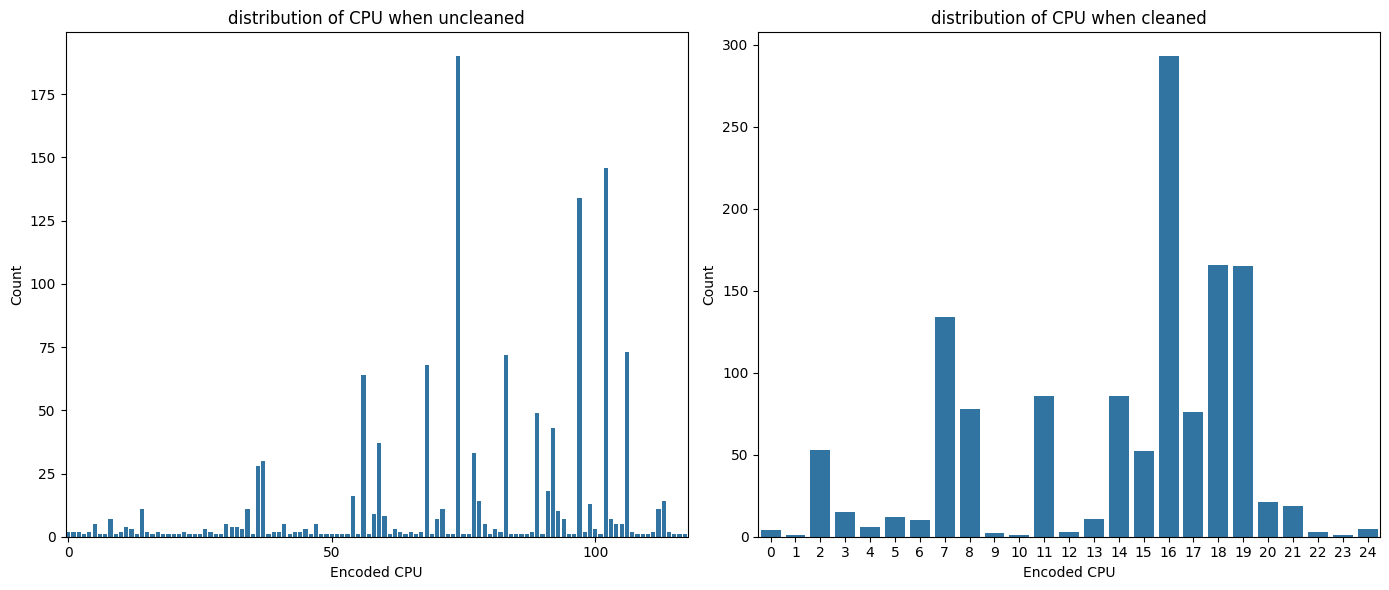

In [65]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
# Mã hóa cột 'Cpu'
test['CPU encoded'] = label_encoder.fit_transform(test['Cpu'])
# Vẽ biểu đồ thứ nhất
plt.subplot(1, 2, 1)
sns.countplot(x='CPU encoded', data=test)
major_locator = MultipleLocator(50)
plt.gca().xaxis.set_major_locator(major_locator)
plt.xlabel('Encoded CPU')
plt.ylabel('Count')
plt.title('distribution of CPU when uncleaned')

# Mã hóa cột 'CPU' cho biểu đồ thứ hai
df_cleaned['CPU encoded'] = label_encoder.fit_transform(df['Cpu'])

# Vẽ biểu đồ thứ hai
plt.subplot(1, 2, 2)
sns.countplot(x='CPU encoded', data=df_cleaned)
plt.xlabel('Encoded CPU')
plt.ylabel('Count')
plt.title('distribution of CPU when cleaned')

plt.gcf().set_size_inches(14, 6)
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [67]:
top_20 = list_gpu_groupby_counts.sort_values(ascending=False)[:20]

Text(0.5, 0, 'Count')

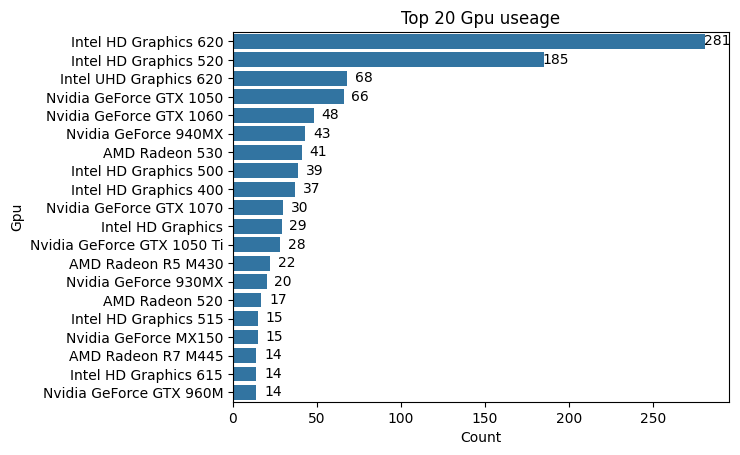

In [68]:
barplot = sns.barplot(x=top_20.values, y=top_20.index)
for i in range(top_20.shape[0]):
    barplot.text(top_20.values[i] + 15, i + 0.2,
                 round(top_20.values[i], 2),
                 color='black', ha="right")

plt.title('Top 20 Gpu useage')
plt.xlabel('Count')

#**Chuẩn hóa dữ liệu**

In [69]:
from sklearn.preprocessing import StandardScaler

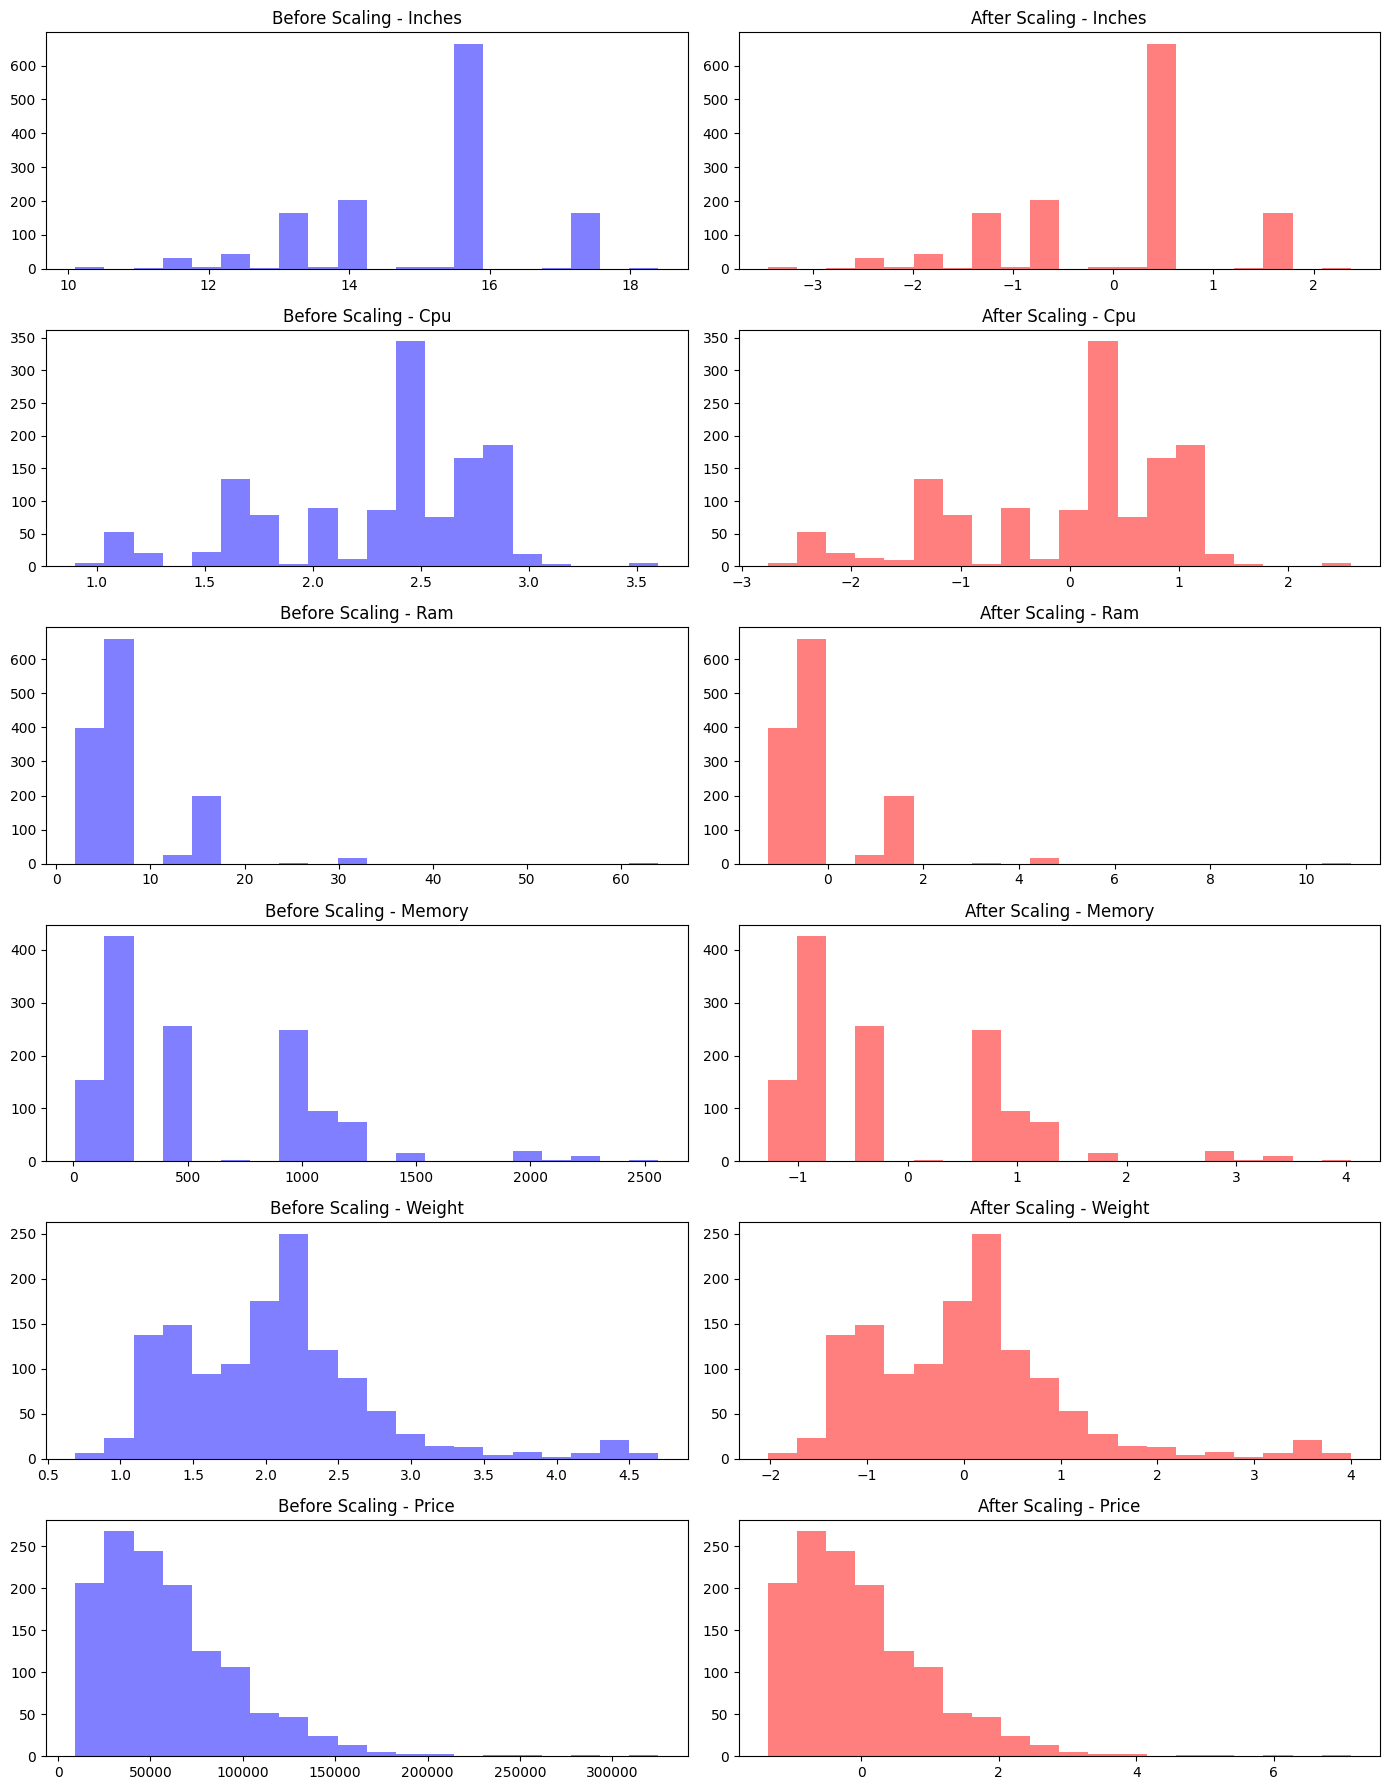

In [72]:
Scaler = StandardScaler()
selected_columns = ['Inches', 'Cpu', 'Ram', "Memory", "Weight", "Price"]
df_selected = df[selected_columns]
df_scaled = Scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=selected_columns)
plt.figure(figsize=(14, 18))  # Change the size of the figure
for i, column in enumerate(selected_columns):
    plt.subplot(6, 2, 2*i + 1)  # Change the number of rows in the subplot
    plt.hist(df[column], bins=20, color='blue', alpha=0.5)
    plt.title(f'Before Scaling - {column}')
    plt.subplot(6, 2, 2*i+2)  # Change the number of rows in the subplot
    plt.hist(df_scaled[column], bins=20, color='red', alpha=0.5)
    plt.title(f'After Scaling - {column}')

plt.tight_layout()
plt.show()

In [87]:
df_scaled.head(5)

,Inches,Cpu,Ram,Memory,Weight,Price
0,-1.204407,0.002426,-0.075195,-1.026162,-1.005283,0.309132
1,-1.204407,-0.985431,-0.075195,-1.026162,-1.050381,-0.321646
2,0.408772,0.397569,-0.075195,-0.759244,-0.268684,-0.785251
3,0.268495,0.792712,1.498767,-0.225410,-0.313782,2.023301
4,-1.204407,1.582997,-0.075195,-0.759244,-1.005283,0.973055


In [90]:
df[selected_columns].head(5).reset_index(drop=True)

,Inches,Cpu,Ram,Memory,Weight,Price
0,13.3,2.3,8.0,128.0,1.37,71378.68
1,13.3,1.8,8.0,128.0,1.34,47895.52
2,15.6,2.5,8.0,256.0,1.86,30636.00
3,15.4,2.7,16.0,512.0,1.83,135195.34
4,13.3,3.1,8.0,256.0,1.37,96095.81


#**Dữ liêu ban đầu**

In [91]:
from IPython.display import display, HTML

In [65]:
df_uncleaned.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


#**Dữ liệu sau khi làm sạch**

In [66]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
index,,,,,,,,,,,
0,APPLE,ULTRABOOK,13.3,2560x1600,2.3,8.0,128.0,Intel Iris Plus Graphics 640,MACOS,1.37,71378.68
1,APPLE,ULTRABOOK,13.3,1440x900,1.8,8.0,128.0,Intel HD Graphics 6000,MACOS,1.34,47895.52
2,HP,NOTEBOOK,15.6,1920x1080,2.5,8.0,256.0,Intel HD Graphics 620,NO OS,1.86,30636.00
3,APPLE,ULTRABOOK,15.4,2880x1800,2.7,16.0,512.0,AMD Radeon Pro 455,MACOS,1.83,135195.34
4,APPLE,ULTRABOOK,13.3,2560x1600,3.1,8.0,256.0,Intel Iris Plus Graphics 650,MACOS,1.37,96095.81
5,ACER,NOTEBOOK,15.6,1366x768,3.0,4.0,500.0,AMD Radeon R5,WINDOWS 10,2.10,21312.00
6,APPLE,ULTRABOOK,15.4,2880x1800,2.2,16.0,256.0,Intel Iris Pro Graphics,MAC OS X,2.04,114017.60
7,APPLE,ULTRABOOK,13.3,1440x900,1.8,8.0,256.0,Intel HD Graphics 6000,MACOS,1.34,61735.54
8,ASUS,ULTRABOOK,14.0,1920x1080,1.8,16.0,512.0,Nvidia GeForce MX150,WINDOWS 10,1.30,79653.60


In [67]:
df.to_csv("clean_laptop_data.csv", index=False)

In [68]:
df[selected_columns] = df_scaled

#**Dữ liệu sau khi làm sạch và chuẩn hóa hoàn tất**

In [69]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
index,,,,,,,,,,,
0,APPLE,ULTRABOOK,-1.204407,2560x1600,0.002426,-0.075195,-1.026162,Intel Iris Plus Graphics 640,MACOS,-1.005283,0.309132
1,APPLE,ULTRABOOK,-1.204407,1440x900,-0.985431,-0.075195,-1.026162,Intel HD Graphics 6000,MACOS,-1.050381,-0.321646
2,HP,NOTEBOOK,0.408772,1920x1080,0.397569,-0.075195,-0.759244,Intel HD Graphics 620,NO OS,-0.268684,-0.785251
3,APPLE,ULTRABOOK,0.268495,2880x1800,0.792712,1.498767,-0.225410,AMD Radeon Pro 455,MACOS,-0.313782,2.023301
4,APPLE,ULTRABOOK,-1.204407,2560x1600,1.582997,-0.075195,-0.759244,Intel Iris Plus Graphics 650,MACOS,-1.005283,0.973055
5,ACER,NOTEBOOK,0.408772,1366x768,1.385426,-0.862176,-0.250433,AMD Radeon R5,WINDOWS 10,0.092099,-1.035702
6,APPLE,ULTRABOOK,0.268495,2880x1800,-0.195145,1.498767,-0.759244,Intel Iris Pro Graphics,MAC OS X,0.001904,1.454449
7,APPLE,ULTRABOOK,-1.204407,1440x900,-0.985431,-0.075195,-0.759244,Intel HD Graphics 6000,MACOS,-1.050381,0.050109
8,ASUS,ULTRABOOK,-0.713439,1920x1080,-0.985431,1.498767,-0.225410,Nvidia GeForce MX150,WINDOWS 10,-1.110512,0.531403


In [70]:
df.to_csv("Clean_and_Scale_laptop_data.csv", index=False)